In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



# Data PreProcessing


### Data Visualization

In [4]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
features =['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
X = dataset[features]
Y = dataset['stroke']

### Treating NaN, null Values

In [7]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
print(X.iloc[:,8:9])

       bmi
0     36.6
1      NaN
2     32.5
3     34.4
4     24.0
...    ...
5105   NaN
5106  40.0
5107  30.6
5108  25.6
5109  26.2

[5110 rows x 1 columns]


In [9]:
# Replacing Null Numeric vals

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(X.iloc[:,8:9])
X.iloc[:,8:9] = imputer.transform(X.iloc[:,8:9])
print(X.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


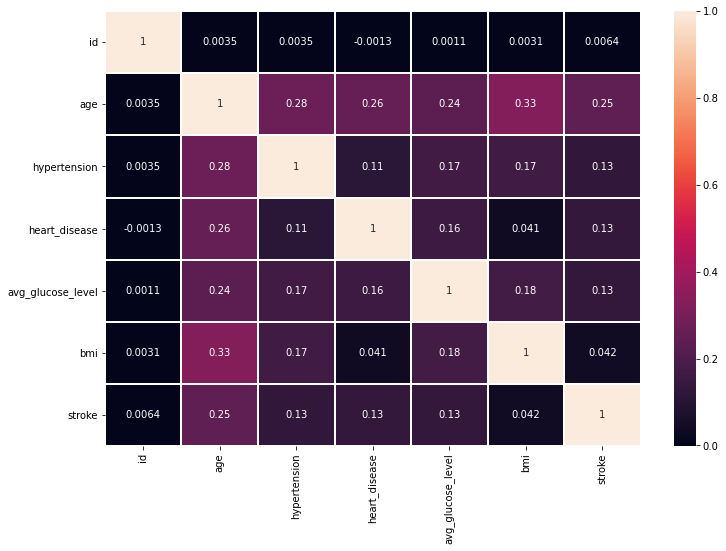

In [10]:
# dropping the rows having NaN values 
# df = pd.DataFrame(X)   
# df = df.dropna()   
# print(df)
plt.figure(figsize = (12, 8))
sns.heatmap(dataset.corr(), linecolor = 'white', linewidths = 1, annot = True)
plt.show()

In [11]:
X['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
from sklearn.utils import resample

train_data = pd.concat([X, Y], axis=1)
# separate minority and majority classes
negative = train_data[train_data.stroke==0]
positive = train_data[train_data.stroke==1]
# upsample minority
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])
# check new class counts
upsampled.stroke.value_counts()


0    4861
1    4861
Name: stroke, dtype: int64

In [13]:
X = upsampled.iloc[:, 0:10]
Y = upsampled.iloc[:,10:11]
# del X_train['stroke']
print(X,Y)

     gender   age  hypertension  heart_disease ever_married      work_type  \
249    Male   3.0             0              0           No       children   
250    Male  58.0             1              0          Yes        Private   
251  Female   8.0             0              0           No        Private   
252  Female  70.0             0              0          Yes        Private   
253    Male  14.0             0              0           No   Never_worked   
..      ...   ...           ...            ...          ...            ...   
136    Male  76.0             0              0          Yes        Private   
134  Female  68.0             1              0          Yes  Self-employed   
192    Male  59.0             0              0          Yes  Self-employed   
177    Male  78.0             1              0          Yes  Self-employed   
163  Female  78.0             1              0           No        Private   

    Residence_type  avg_glucose_level   bmi   smoking_status  


### Treating Categorical Variables


In [14]:
X.dtypes
Categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
for col in Categorical_cols:
    print('Column Name: ' +col)
    print(X[col].value_counts())

Column Name: gender
Female    5622
Male      4099
Other        1
Name: gender, dtype: int64
Column Name: ever_married
Yes    7429
No     2293
Name: ever_married, dtype: int64
Column Name: work_type
Private          5658
Self-employed    2026
Govt_job         1290
children          726
Never_worked       22
Name: work_type, dtype: int64
Column Name: Residence_type
Urban    5141
Rural    4581
Name: Residence_type, dtype: int64
Column Name: smoking_status
never smoked       3509
Unknown            2436
formerly smoked    2164
smokes             1613
Name: smoking_status, dtype: int64


In [15]:
# Treating Independent Varibles


# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
# df = np.array(ct.fit_transform(df))

                    #OR

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(OH_encoder.fit_transform(X[Categorical_cols]))

# One-hot encoding removed index; put it back
X_encoded.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(Categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, X_encoded], axis=1)

In [16]:
print(OH_X)

      age  hypertension  heart_disease  avg_glucose_level   bmi    0    1  \
249   3.0             0              0              95.12  18.0  0.0  1.0   
250  58.0             1              0              87.96  39.2  0.0  1.0   
251   8.0             0              0             110.89  17.6  1.0  0.0   
252  70.0             0              0              69.04  35.9  1.0  0.0   
253  14.0             0              0             161.28  19.1  0.0  1.0   
..    ...           ...            ...                ...   ...  ...  ...   
136  76.0             0              0             140.10  29.9  0.0  1.0   
134  68.0             1              0             206.09  26.7  1.0  0.0   
192  59.0             0              0             118.03  35.5  0.0  1.0   
177  78.0             1              0              56.11  25.5  0.0  1.0   
163  78.0             1              0             203.87  45.7  1.0  0.0   

       2    3    4  ...    6    7    8    9   10   11   12   13   14   15  

In [17]:
OH_X.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
count,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,...,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000,9722.000000
mean,54.714779,0.172907,0.119420,118.435626,29.501449,0.578276,0.421621,0.000103,0.235857,0.764143,...,0.002263,0.581979,0.208393,0.074676,0.471199,0.528801,0.250566,0.222588,0.360934,0.165912
std,22.197535,0.378186,0.324299,55.172529,6.851014,0.493860,0.493844,0.010142,0.424555,0.424555,...,0.047519,0.493259,0.406180,0.262881,0.499196,0.499196,0.433361,0.416005,0.480296,0.372021
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.000000,78.040000,25.400000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,0.000000,0.000000,96.895000,28.893237,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,0.000000,0.000000,144.900000,32.500000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
Y

,stroke
249,0
250,0
251,0
252,0
253,0
...,...
136,1
134,1
192,1
177,1


### Splitting Dataset


In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(OH_X, Y, test_size = 0.2, random_state = 1)

### Feature Scaling


In [20]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

In [21]:
X_train.iloc[:,0:5]

,age,hypertension,heart_disease,avg_glucose_level,bmi
4880,65.0,0,0,95.44,25.5
3631,62.0,0,0,56.74,28.9
130,73.0,1,0,190.14,36.5
97,58.0,0,1,240.59,31.4
97,58.0,0,1,240.59,31.4
...,...,...,...,...,...
3144,79.0,0,0,82.07,30.4
14,79.0,0,1,214.09,28.2
1154,21.0,0,0,112.07,28.2
80,59.0,0,0,96.16,44.1


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,0:5] = sc.fit_transform(X_train.iloc[:,0:5])
X_test.iloc[:,0:5] = sc.transform(X_test.iloc[:,0:5])
print(X_train,X_test)

           age  hypertension  heart_disease  avg_glucose_level       bmi    0  \
4880  0.458394     -0.458314      -0.368095          -0.416199 -0.584501  1.0   
3631  0.323375     -0.458314      -0.368095          -1.116222 -0.089405  1.0   
130   0.818446      2.181912      -0.368095           1.296779  1.017280  1.0   
97    0.143350     -0.458314       2.716687           2.209343  0.274636  0.0   
97    0.143350     -0.458314       2.716687           2.209343  0.274636  0.0   
...        ...           ...            ...                ...       ...  ...   
3144  1.088484     -0.458314      -0.368095          -0.658041  0.129019  1.0   
14    1.088484     -0.458314       2.716687           1.729998 -0.191337  1.0   
1154 -1.521887     -0.458314      -0.368095          -0.115387 -0.191337  1.0   
80    0.188356     -0.458314      -0.368095          -0.403175  2.123965  0.0   
484  -0.306714     -0.458314      -0.368095           0.246563  0.303759  1.0   

        1    2    3    4  .

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### Models


#### Regression


[[704 271]
 [125 845]] Nodes:  10 0.7964010282776349
[[735 240]
 [107 863]] Nodes:  25 0.8215938303341902
[[722 253]
 [ 35 935]] Nodes:  50 0.8519280205655527
[[775 200]
 [  3 967]] Nodes:  100 0.8956298200514139


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

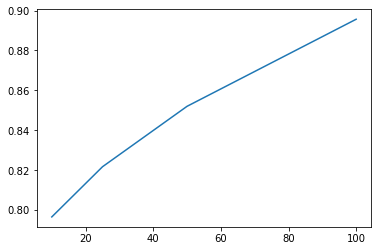

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix
nodes = [10,25,50,100]
accuracy =[]
for node in nodes:    
    model = DecisionTreeClassifier(random_state=1,max_leaf_nodes=node)
    model.fit(X_train,Y_train)
    preds = model.predict(X_test)
    accs = accuracy_score(Y_test,preds.round())
    accuracy.append(accs)
    print(confusion_matrix(Y_test,preds.round()),'Nodes: ', node,accs)
# print(accuracy)
sns.lineplot(nodes,accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[952  23]
 [  0 970]] No of Estimators:  10 0.9881748071979435
[[952  23]
 [  0 970]] No of Estimators:  15 0.9881748071979435
[[958  17]
 [  0 970]] No of Estimators:  20 0.9912596401028277
[[954  21]
 [  0 970]] No of Estimators:  25 0.9892030848329049


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[958  17]
 [  0 970]] No of Estimators:  50 0.9912596401028277


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[[957  18]
 [  0 970]] No of Estimators:  100 0.990745501285347


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

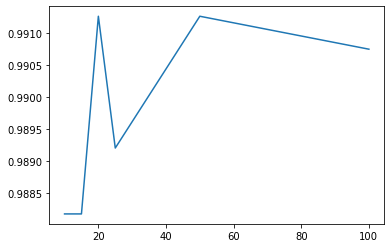

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error
nodes = [10,15,20,25,50,100]
accuracy =[]
for node in nodes:    
    model = RandomForestClassifier(criterion = 'entropy', random_state=0, n_estimators=node)
    model.fit(X_train,Y_train)
    preds = model.predict(X_test)
    accs = accuracy_score(Y_test,preds.round())
    accuracy.append(accs)
    print(confusion_matrix(Y_test,preds.round()),'No of Estimators: ', node,accs)

sns.lineplot(nodes,accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[850 125]
 [  0 970]] No of Neighbors:  5 0.9357326478149101


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[780 195]
 [  0 970]] No of Neighbors:  10 0.8997429305912596


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[711 264]
 [  7 963]] No of Neighbors:  15 0.860668380462725


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[678 297]
 [ 29 941]] No of Neighbors:  20 0.8323907455012853


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[640 335]
 [ 23 947]] No of Neighbors:  25 0.8159383033419023


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[646 329]
 [113 857]] No of Neighbors:  50 0.7727506426735219


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[661 314]
 [125 845]] No of Neighbors:  100 0.774293059125964


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

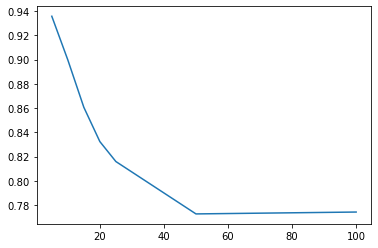

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error
nodes = [5,10,15,20,25,50,100]
accuracy =[]
for node in nodes:    
    classifier = KNeighborsClassifier(n_neighbors = node, metric = 'minkowski',p=2)
    classifier.fit(X_train,Y_train)
    preds = classifier.predict(X_test)
    accs = accuracy_score(Y_test,preds.round())
    accuracy.append(accs)
    print(confusion_matrix(Y_test,preds),'No of Neighbors: ', node,accs)

sns.lineplot(nodes,accuracy)



In [26]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(loss = 'mean_squared_error' , optimizer = 'adam')
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)
y_pred = ann.predict(X_test)
accs = accuracy_score(Y_test,y_pred.round())
print(confusion_matrix(Y_test,y_pred.round()),accs)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

244/244 [==============================] - 0s 1ms/step - loss: 0.4245
Epoch 2/100
244/244 [==============================] - 0s 948us/step - loss: 0.2002
Epoch 3/100
244/244 [==============================] - 0s 899us/step - loss: 0.1760
Epoch 4/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1650
Epoch 5/100
244/244 [==============================] - 0s 999us/step - loss: 0.1603
Epoch 6/100
244/244 [==============================] - 0s 820us/step - loss: 0.1581
Epoch 7/

244/244 [==============================] - 0s 1ms/step - loss: 0.1376
Epoch 90/100
244/244 [==============================] - 0s 881us/step - loss: 0.1384
Epoch 91/100
244/244 [==============================] - 0s 896us/step - loss: 0.1375
Epoch 92/100
244/244 [==============================] - 0s 924us/step - loss: 0.1376
Epoch 93/100
244/244 [==============================] - 0s 918us/step - loss: 0.1376
Epoch 94/100
244/244 [==============================] - 0s 1ms/step - loss: 0.1379A: 0s - loss: 0.
Epoch 95/100
244/244 [==============================] - 0s 849us/step - loss: 0.1376
Epoch 96/100
244/244 [==============================] - 0s 811us/step - loss: 0.1381
Epoch 97/100
244/244 [==============================] - 0s 863us/step - loss: 0.1374
Epoch 98/100
244/244 [==============================] - 0s 905us/step - loss: 0.1376
Epoch 99/100
244/244 [==============================] - 0s 918us/step - loss: 0.1375
Epoch 100/100
244/244 [==============================] - 0s 1ms/st

In [27]:
from xgboost import XGBClassifier   #XGBRegressor for Regression
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[926  49]
 [  0 970]]


0.9748071979434447

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[148 827]
 [ 10 960]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5696658097686376